# LSA Exercise

The purpose of this exercise is to use LSA in order to run unsupervised topic extraction on texts and compare the results to the target variable. We are not going to use the target variable to train a model but only to assess if the topics found by LSA are similar to the classes that would have been used for supervised classification.

1. Let's begin and import the libraries we will be using

In [1]:
pip install spacy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
! python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import pandas as pd 
import numpy as np
import spacy
import en_core_web_sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

2. Load the 20 news dataset into an object news

In [2]:
news = fetch_20newsgroups()

In [4]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
len(news['target'])

11314

In [129]:
df = pd.DataFrame(news.data, columns=['text'])
df = df.sample(500)
df['target'] = news.target[df.index]

In [130]:
df.head()

,text,target
854,From: jbourgui@ucs.indiana.edu (Opso Lopso)\nS...,8
10347,From: jen187@its.CSIRO.AU (Graham Jenkins +61 ...,0
3762,From: pvconway@cudnvr.denver.colorado.edu\nSub...,1
8662,From: eab@msc.edu (Edward Bertsch)\nSubject: R...,11
6691,From: Graham Toal <gtoal@gtoal.com>\nSubject: ...,11


3. Display the data description using the DESCR key

In [131]:
data = pd.DataFrame(news.data, columns =["text"])
data = data.sample(50)

In [132]:
news.target

array([7, 4, 4, ..., 3, 1, 8])

4. Store the object news.data in a DataFrame and call the column text. Extract a sample of 5000 rows to begin with. Add the target variable to this dataframe in order to run analysis later.

In [133]:
data.index

Int64Index([10201,  5548,  2255,  2826,   392,  8549,  4184,  8102,  5954,
             3124,  1316,  9923,  9203,  8601,  3939,   443,  5297,  8274,
             9852,  1271, 10386,  6738, 10817,  6160,  7594,  5054,  2547,
             7362,  1263,  3171,  5018, 10605,  6726,  1244,  8284,  5438,
             9545,  7769,  1516,  3692,  6416,  2901, 10574,   995, 10043,
             1158,  9859,  1045,  5758,  9630],
           dtype='int64')

In [137]:
df = pd.DataFrame(news.data, columns =["text"])
df = data.sample(500)
df["target"] = news.target[df.index]
df.head()


,text,target
3978,From: pooder@rchland.vnet.ibm.com (Don Fearn)\...,8
2235,From: rbemben@timewarp.prime.com (Rich Bemben)...,8
999,From: dxf12@po.cwru.edu (Douglas Fowler)\nSubj...,15
1852,From: lovall@bohr.physics.purdue.edu (Daniel L...,7
7023,From: ak296@yfn.ysu.edu (John R. Daker)\nSubje...,8


5. Create a column text_clean containing only alphanumerical characters and change all characters to lowercase. Also only keep the tex that is after the string "Subject:"

In [138]:
df['text_clean'] = df['text'].apply(lambda x: x.split('Subject')[1])

In [31]:
'12334#'.isalnum()

False

In [33]:
ch = '12334#'
list_ = []
for letter in ch:
    if letter.isalnum() or letter == ' ':
        list_.append(letter)

In [20]:
number_of_lines = 0
for text in df['text']:
    if 'Subject' in  text: 
        number_of_lines += 1

In [49]:
df[df['text'].str.replace('[^a-zA-Z0-9]', ' ').str.find('+') != -1]

/tmp/ipykernel_195/994083192.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df[df['text'].str.replace('[^a-zA-Z0-9]', ' ').str.find('+') != -1]


,text,target,text_clean


In [50]:
x = '12234 ## 3'
list_comprehension = [ch for ch in x if ch.isalnum() or ch==" "]

list_comprehension = []
for ch in x : 
    if ch.isalnum() or ch == ' ':
        list_comprehension.append(ch)

In [51]:
list_comprehension

['1', '2', '2', '3', '4', ' ', ' ', '3']

In [139]:
df['text_clean'] = df['text'].apply(lambda x: x.split("Subject:")[1])
df['text_clean'] = df['text_clean'].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch==" "))
df['text_clean'] = df['text_clean'].fillna('').apply(lambda x: x.lower())
df.head()


,text,target,text_clean
3978,From: pooder@rchland.vnet.ibm.com (Don Fearn)\...,8,re antifreezecoolantreplyto poodermsus1msused...
2235,From: rbemben@timewarp.prime.com (Rich Bemben)...,8,re riceburner respectexpires 15 may 93 050000...
999,From: dxf12@po.cwru.edu (Douglas Fowler)\nSubj...,15,re christian parentingorganization case weste...
1852,From: lovall@bohr.physics.purdue.edu (Daniel L...,7,buick heater controlssummary my air vents don...
7023,From: ak296@yfn.ysu.edu (John R. Daker)\nSubje...,8,re vmax handling requestorganization st eliza...


6. Create an object nlp with ```en_core_web_sm.load``` 

In [52]:
nlp = en_core_web_sm.load()

7. Tokenize the cleaned sentences and remove english stopwords

In [60]:
from spacy.lang.en.stop_words import STOP_WORDS


In [62]:
for token in nlp('this is something that renault has'):
    if token.text not in STOP_WORDS:
        print(token.lemma_)

renault


In [140]:
df["text_tokenized"] = df["text_clean"].apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])
df.head()

,text,target,text_clean,text_tokenized
3978,From: pooder@rchland.vnet.ibm.com (Don Fearn)\...,8,re antifreezecoolantreplyto poodermsus1msused...,"[ , antifreezecoolantreplyto, poodermsus1msuse..."
2235,From: rbemben@timewarp.prime.com (Rich Bemben)...,8,re riceburner respectexpires 15 may 93 050000...,"[ , riceburner, respectexpire, 15, 93, 050000,..."
999,From: dxf12@po.cwru.edu (Douglas Fowler)\nSubj...,15,re christian parentingorganization case weste...,"[ , christian, parentingorganization, case, we..."
1852,From: lovall@bohr.physics.purdue.edu (Daniel L...,7,buick heater controlssummary my air vents don...,"[ , buick, heater, controlssummary, air, vent,..."
7023,From: ak296@yfn.ysu.edu (John R. Daker)\nSubje...,8,re vmax handling requestorganization st eliza...,"[ , vmax, handling, requestorganization, st, e..."


8. Detokenize the tokenized sentences and store them in an ```nlp_ready``` column

In [142]:
df['nlp_ready'] = df['text_tokenized'].apply(lambda x: ' '.join(x))

In [66]:
# de-tokenization
detokenized_doc = []
for sentence in df["text_tokenized"]:
    t = ' '.join(sentence)
    detokenized_doc.append(t)

df['nlp_ready'] = detokenized_doc
df.head()

,text,target,text_clean,text_tokenized,nlp_ready
1190,From: bcwhite@sunee.uwaterloo.ca (Brian C. Whi...,3,re scsi on doskeywords scsi dos streamerorgan...,"[ , scsi, doskeyword, scsi, do, streamerorgani...",scsi doskeyword scsi do streamerorganization...
2132,From: karu@nevada.edu (NARANAPITI KARUNARATNE)...,6,software and hardware for salenntppostinghost...,"[ , software, hardware, salenntppostinghost, h...",software hardware salenntppostinghost helios...
5811,From: howland@noc2.arc.nasa.gov (Curt Howland)...,8,re another question about synthetic engiartic...,"[ , question, synthetic, engiarticleid, news19...",question synthetic engiarticleid news1993apr...
10447,From: kane@buast7.bu.edu (Hot Young Star)\nSub...,18,re why not concentrate on child molestersorga...,"[ , concentrate, child, molestersorganization,...",concentrate child molestersorganization astr...
4210,From: behanna@syl.nj.nec.com (Chris BeHanna)\n...,8,re questionorganization nec systems laborator...,"[ , questionorganization, nec, system, laborat...",questionorganization nec system laboratory i...


9. Use sklearn to calculate the tf-idf

In [143]:
# TF-IDF vector
vectorizer = TfidfVectorizer(smooth_idf=True)
X = vectorizer.fit_transform(df['nlp_ready'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

10. Use the truncatedSVD model in order to create a topic model with 20 different topics

In [144]:
temp = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [145]:
temp.shape

(500, 20718)

In [126]:
columns = ["topic_{}".format(i+1) for i in range(200)]

In [128]:
lsa.shape

(50, 50)

In [146]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=200, algorithm='randomized', n_iter=100)
lsa = svd_model.fit_transform(X)

topic_encoded_df = pd.DataFrame(lsa, )
topic_encoded_df["text"] = df['nlp_ready'].values
topic_encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,text
0,0.124884,-0.029251,-0.011323,-0.007383,0.018933,-0.048884,-0.008937,0.010148,-0.071645,-0.033560,...,0.024099,-0.019296,0.073424,-0.020705,-0.004542,0.014666,-0.025993,-0.017615,-0.003799,antifreezecoolantreplyto poodermsus1msusedud...
1,0.091002,0.036687,0.017045,0.035526,-0.009181,-0.032670,-0.015023,-0.015736,0.033956,-0.039466,...,-0.042108,-0.008749,-0.023493,-0.039250,0.024305,0.002881,-0.008072,-0.041361,0.000216,riceburner respectexpire 15 93 050000 gmtorg...
2,0.217672,0.043859,0.011919,0.000826,0.002177,-0.007775,-0.023249,0.022290,-0.033430,0.002610,...,0.009507,-0.031294,0.065859,-0.010579,-0.041290,-0.022159,-0.030737,0.109886,0.031087,christian parentingorganization case western...
3,0.133333,-0.057251,0.007916,0.016346,0.003989,-0.032272,-0.065291,0.020930,-0.000760,-0.069723,...,0.003970,0.023480,-0.028018,-0.043305,0.041380,0.011447,0.043247,0.010868,-0.018849,buick heater controlssummary air vent not wo...
4,0.047996,0.000353,0.000690,-0.001346,-0.010573,-0.007255,-0.003922,0.028765,-0.008552,-0.015582,...,0.096282,-0.080670,0.008462,0.023989,-0.025299,-0.038275,0.009188,0.042762,0.136964,vmax handling requestorganization st elizabe...


In [147]:
svd_model.explained_variance_ratio_.sum()

0.5281290188873475

11. Assign each document to the topic it is the most linked to :

In [86]:
list_ = [1,2,3,4,5,3,4,3,3]
max_value = 0
for elem in list_ : 
    if elem > max_value: 
        max_value = elem
        
max_value_index = 0
for index_, value in enumerate(list_):
    if value == max_value:
        max_value_index = value

In [87]:
f"topic_{max_value_index+1}"

'topic_6'

In [90]:
f"topic_{np.argmax([1,3,4,5])+1}"

'topic_4'

In [97]:
topic_encoded_df.columns[:-2]

Index(['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6',
       'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12',
       'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18',
       'topic_19'],
      dtype='object')

In [103]:
topic_encoded_df['associated_topic'] = topic_encoded_df[topic_encoded_df.columns[:-2]].apply(lambda x: f"topic_{np.argmax(x) + 1}", axis=1)

In [ ]:
topic_encoded_df["class_pred"] = [np.argmax(topic) for topic in lsa]
topic_encoded_df["class_pred"].value_counts()

0     8
3     5
9     5
16    4
8     3
5     3
11    3
19    2
2     2
6     2
14    2
1     2
10    2
18    1
13    1
7     1
12    1
15    1
17    1
4     1
Name: class_pred, dtype: int64

12. Add the target variable to thetopic model dataframe and print the confusion matrix for the topic against the target variable :

In [106]:
topic_encoded_df["target"] = news.target[df.index]
topic_encoded_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,text,associated_topic,target
1190,0.226458,-0.019010,-0.021237,-0.075753,0.253905,0.019836,-0.247616,0.427476,-0.107676,0.003088,...,-0.035296,-0.011756,-0.101075,0.029267,0.065086,-0.179077,0.030190,scsi doskeyword scsi do streamerorganization...,topic_8,3
2132,0.240759,0.495484,0.190210,-0.062755,-0.075327,0.006973,-0.112005,-0.102923,0.016316,-0.063642,...,0.069564,0.001712,-0.044352,0.015109,-0.110880,-0.021781,0.046915,software hardware salenntppostinghost helios...,topic_2,6
5811,0.151181,-0.038888,-0.055264,0.018308,0.064706,-0.023744,-0.085172,-0.045130,0.073367,0.132700,...,-0.062571,0.160261,-0.261974,-0.164262,0.240128,0.276502,0.048861,question synthetic engiarticleid news1993apr...,topic_19,8
10447,0.186337,-0.131326,-0.133086,-0.160622,0.134056,0.375269,-0.027360,0.118368,-0.078214,-0.184291,...,0.016054,-0.095085,0.098223,0.012949,0.143452,-0.025196,0.018985,concentrate child molestersorganization astr...,topic_6,18
4210,0.234891,-0.277799,0.564380,0.302284,-0.018927,0.058837,0.048291,0.078419,-0.047516,-0.111745,...,0.038437,-0.136915,-0.023312,-0.104989,-0.044167,-0.015251,0.013472,questionorganization nec system laboratory i...,topic_3,8


In [115]:
'vanessa_guillaume'.split('_')

['vanessa', 'guillaume']

In [119]:
X = pd.get_dummies(topic_encoded_df["associated_topic"])

Text(159.0, 0.5, 'True label')

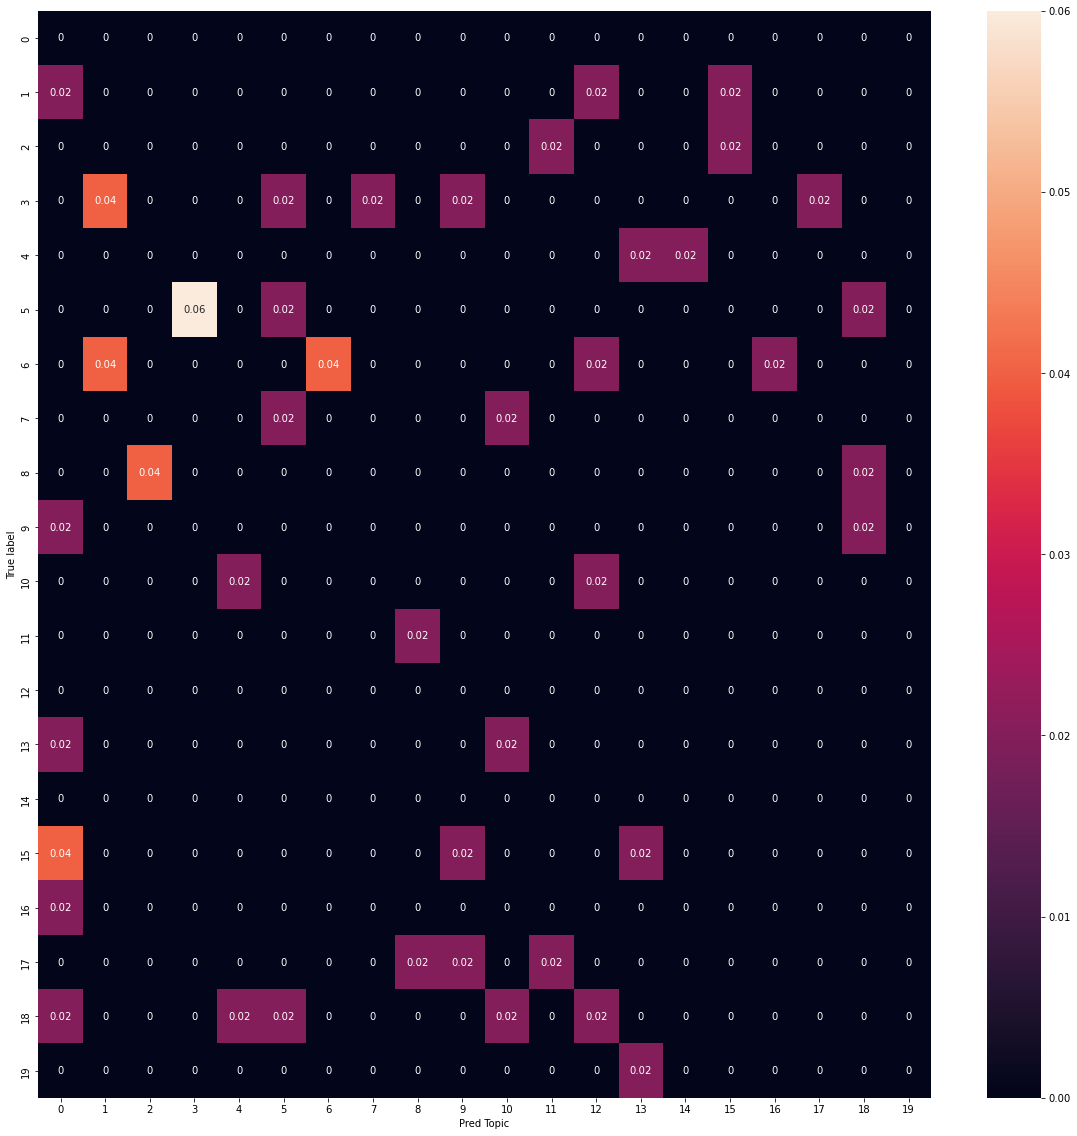

In [116]:
prediction = topic_encoded_df["associated_topic"].apply(lambda x: int(x.split('_')[-1]) -1)

cm = confusion_matrix(y_true = topic_encoded_df["target"], y_pred = prediction) / df.shape[0]

fig, ax = plt.subplots(1,1, figsize = (20,20))
sns.heatmap(cm, annot=True)
ax.set_xlabel("Pred Topic")
ax.set_ylabel("True label")

Conclusion : the topics found by LSA are very different from the target ! Here we can see that topic 0 is very frequent among the documents and spans accross lots of the target categories. 
LSA is very convenient to find some structure among a text corpus, but it usually creates topics that are quite different from the categories that would have been determined by a human.

Reminder : contrary to supervised classification and unsupervised clustering, LSA is based on the hypothesis that a given document can be related to several topics. This makes the interpretation of the model's output more complicated, but allows to create topic models that are more realistic (because in real life, a document is often related to different topics !)